objective:
To build a predictive model that predict customer churn of the company

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//dhruv//Downloads//bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.shape
#gives dimension of the dataset

(4521, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.columns
#gives columns of the datset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

[Text(0.5, 1.0, 'which age-group people churn more')]

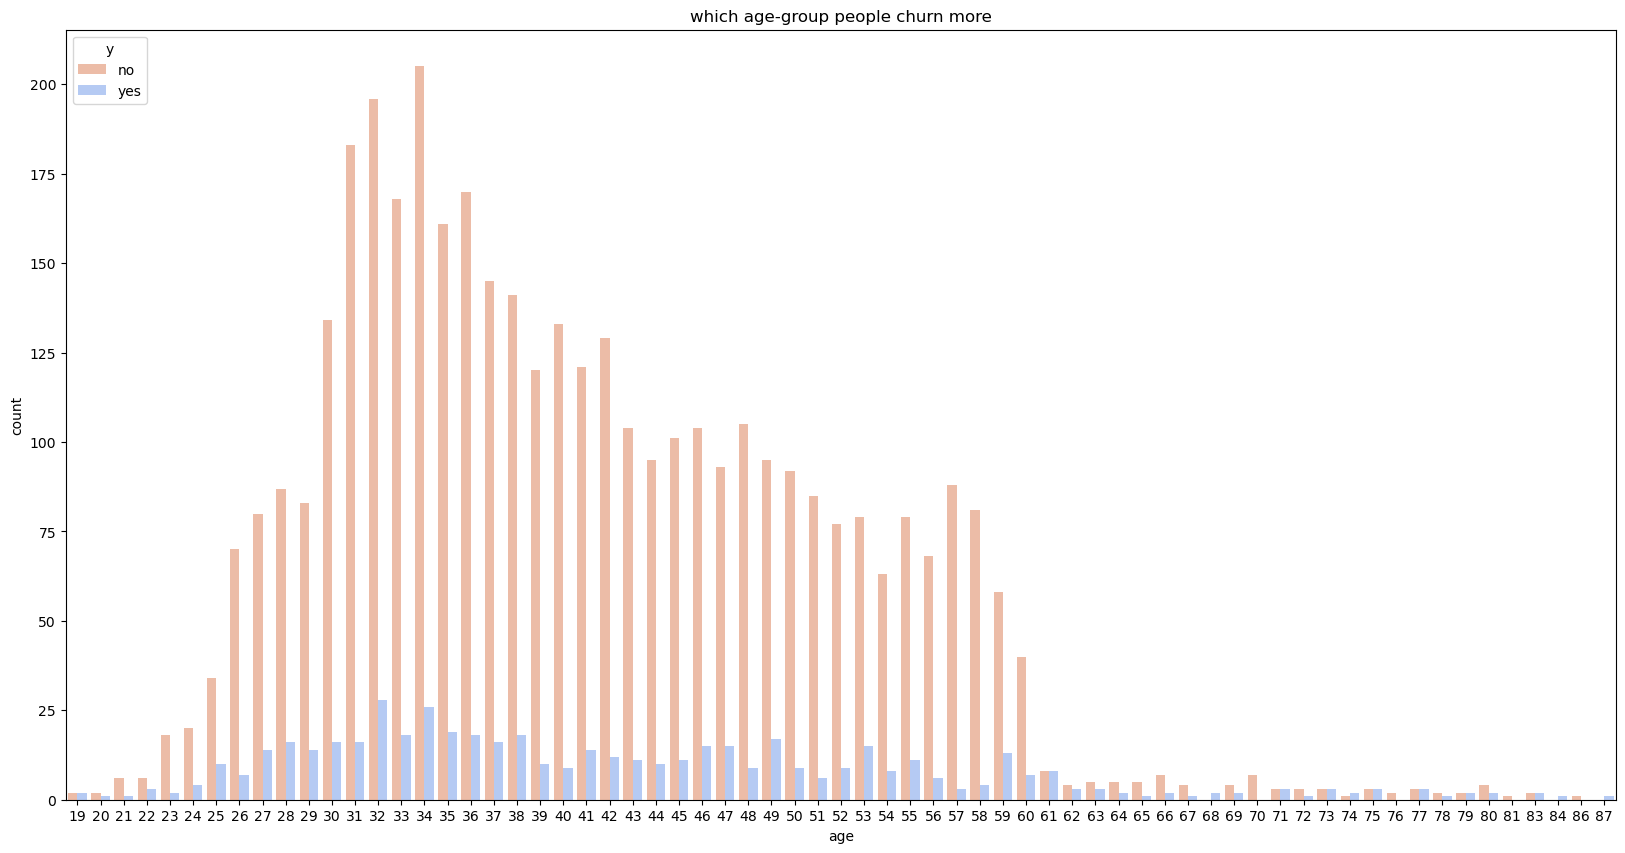

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x='age',data =df,hue='y',palette='coolwarm_r').set(title="which age-group people churn more")

In [8]:
df.dtypes
#data types of the variables

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<AxesSubplot:>

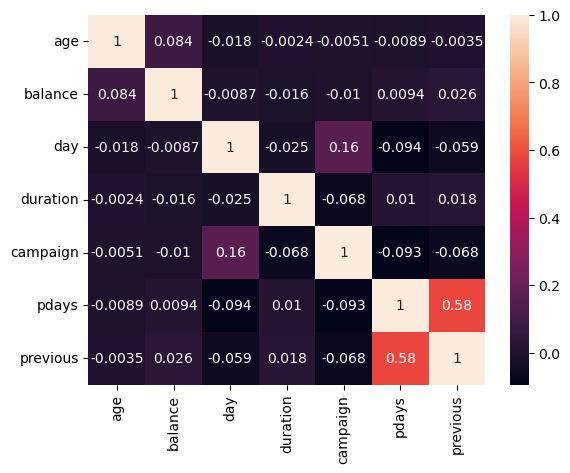

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
print("Rows:             ", df.shape[0])
print("Columns:          ", df.shape[1])
print("\nFeatures:     \n", df.columns.tolist())
print("\nMissing Values: ", df.isnull().sum().values.sum(), "\n", df.isnull().sum())
print("\nUnique Values:  \n", df.nunique())

Rows:              4521
Columns:           17

Features:     
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing Values:  0 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Unique Values:  
 age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


<AxesSubplot:ylabel='job'>

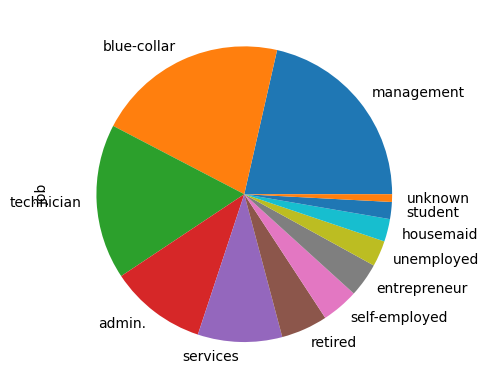

In [11]:
df['job'].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='poutcome'>

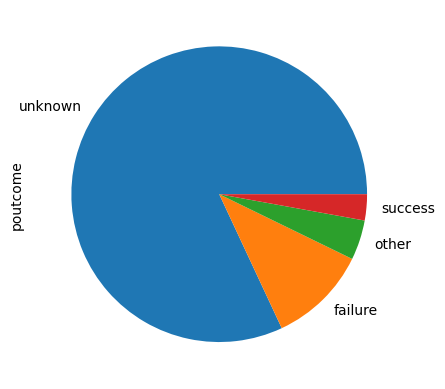

In [12]:
df['poutcome'].value_counts().plot(kind="pie")


## over all distribution

#plt.rcParams['figure.figsize'] = (15, 15)
#plt.rcParams['figure.dpi'] = 150

# Age
plt.subplot(4, 2, 1)
sns.distplot(df['age'], color='greenyellow')
plt.title('Distribution of age', fontsize = 12)
plt.tight_layout()
plt.grid()

# balance
plt.subplot(4, 2, 2)
sns.distplot(df['balance'], color='firebrick')
plt.title('Distribution of balance', fontsize = 12)
plt.tight_layout()
plt.grid()

# pdays
plt.subplot(4, 2, 3)
sns.distplot(df['pdays'], color = 'orange')
plt.title('Distribution of pdays', fontsize = 12)
plt.tight_layout()
plt.grid()

# campaigns
plt.subplot(4, 2, 4)
sns.distplot(df['campaign'], color = 'lightcoral')
plt.title('Distripution of campaigns', fontsize = 12)
plt.tight_layout()
plt.grid()

# previous
plt.subplot(4, 2, 5)
sns.distplot(df['previous'], color = 'olivedrab')
plt.title('Distripution of previous', fontsize = 12)
plt.tight_layout()
plt.grid()

# balance
plt.subplot(4, 2, 6)
sns.distplot(df['balance'], color = 'crimson')
plt.title('Distripution of balance', fontsize = 12)
plt.tight_layout()
plt.grid()

# duration
plt.subplot(4, 2, 7)
sns.distplot(df['duration'], color = 'purple')
plt.title('Distripution of Duration', fontsize = 12)
plt.tight_layout()
plt.grid()

In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
y = pd.DataFrame(df.y.value_counts())
print(y.iloc[:,0])

no     4000
yes     521
Name: y, dtype: int64


[Text(0.5, 1.0, 'Distribution of Churn education wise')]

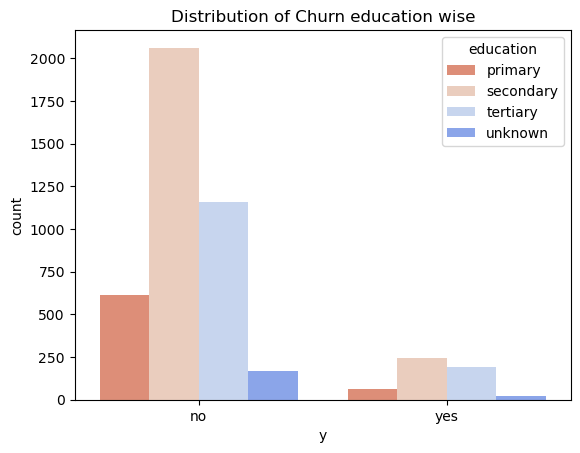

In [16]:
sns.countplot(x='y',data=df,hue='education',palette='coolwarm_r').set(title= "Distribution of Churn education wise")

<AxesSubplot:title={'center':'Distribution of target variable'}>

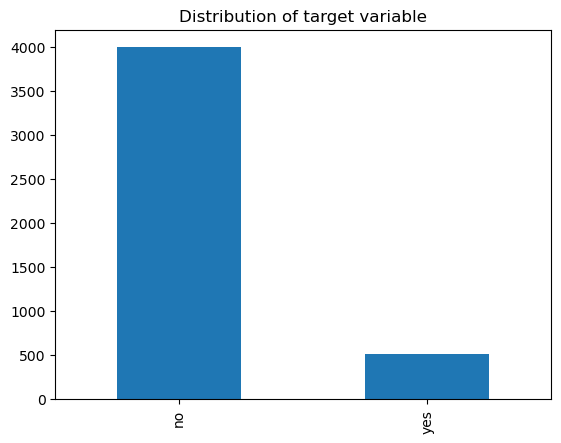

In [17]:
df['y'].value_counts().plot(kind="bar",title= "Distribution of target variable")

[Text(0.5, 1.0, 'Distribution of churn marital-status wise')]

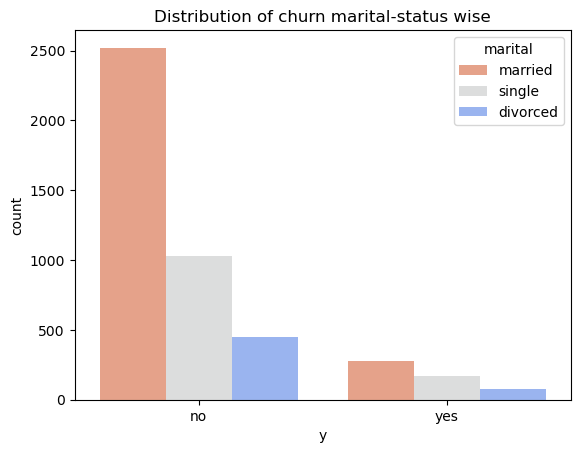

In [18]:
sns.countplot(x='y',data=df,hue='marital',palette='coolwarm_r').set(title="Distribution of churn marital-status wise")

[Text(0.5, 1.0, 'Job')]

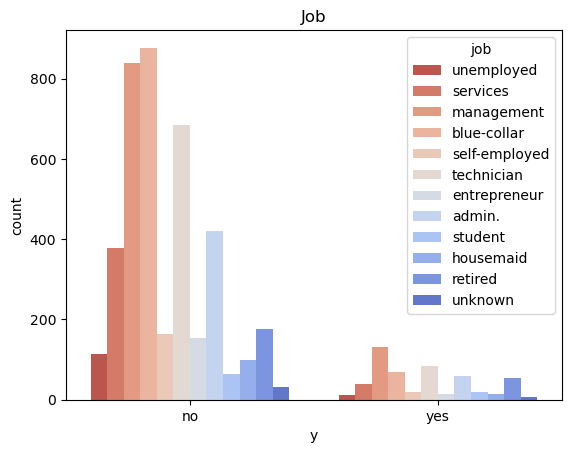

In [19]:
sns.countplot(x='y',data=df,hue='job',palette='coolwarm_r').set(title="Job")

[Text(0.5, 1.0, 'Distribution of Target Variable')]

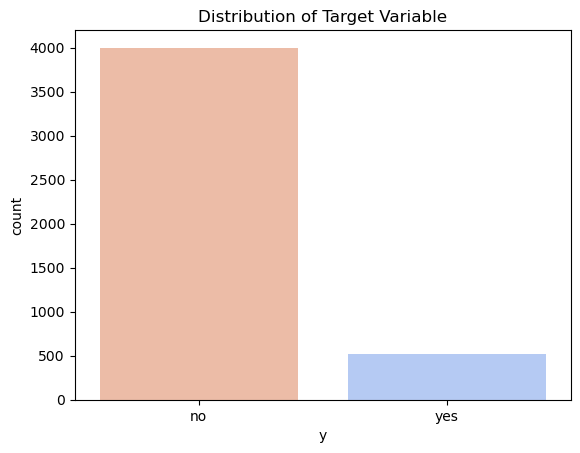

In [20]:
sns.countplot(x='y',data=df,palette='coolwarm_r').set(title="Distribution of Target Variable")

[Text(0.5, 1.0, 'Distribution of churn who are having housing loan')]

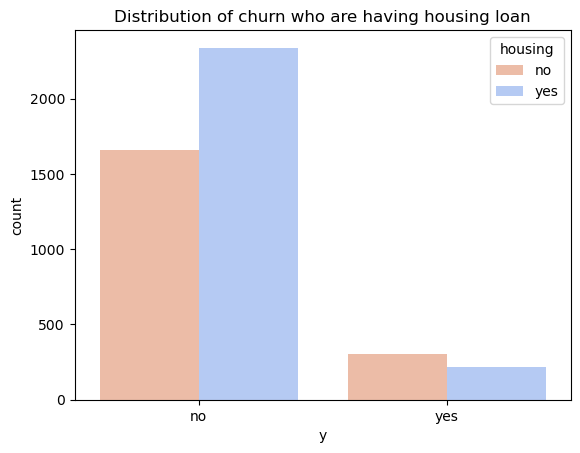

In [21]:
sns.countplot(x='y',data=df,hue='housing',palette='coolwarm_r').set(title= "Distribution of churn who are having housing loan")

[Text(0.5, 1.0, 'Loan-wise distribution of churn')]

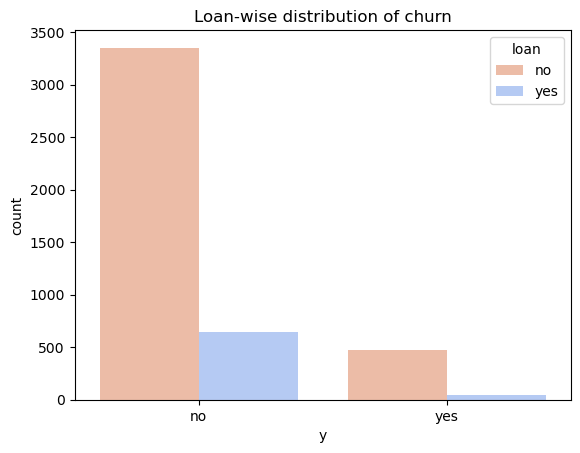

In [22]:
sns.countplot(x='y',data=df,hue='loan',palette='coolwarm_r').set(title="Loan-wise distribution of churn")

[Text(0.5, 1.0, 'Distribution of churn contact-wise')]

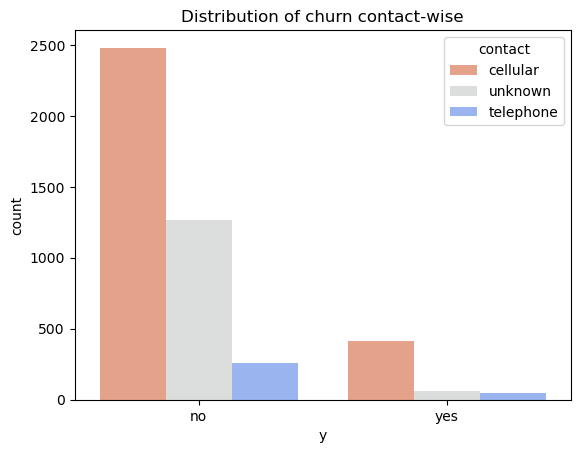

In [23]:
sns.countplot(x='y',data=df,hue='contact',palette='coolwarm_r').set(title="Distribution of churn contact-wise")

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [25]:
#sns.pairplot(df, hue = 'y')


In [26]:
# creating list of categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == "O"]
numerical_cols = [col for col in df.columns if df[col].dtype != "O"]

In [27]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [28]:
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [29]:
#encoding techniques for categorical variables
# month and education are ordinal categorical vaiables
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [30]:
df["y"] = df["y"].map(lambda x: 1 if x=="yes" else 0)

In [31]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [32]:
#checking how many class are there in each categorical varibales

In [33]:

print(df['job'].value_counts())


management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64


In [34]:
print(df['marital'].value_counts())

married     2797
single      1196
divorced     528
Name: marital, dtype: int64


In [35]:
print(df['education'].value_counts())

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


In [36]:
print(df['default'].value_counts())

no     4445
yes      76
Name: default, dtype: int64


In [37]:
print(df['loan'].value_counts())

no     3830
yes     691
Name: loan, dtype: int64


In [38]:
print(df['housing'].value_counts())

yes    2559
no     1962
Name: housing, dtype: int64


In [39]:
print(df['contact'].value_counts())

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


In [40]:
print(df['month'].value_counts())

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64


In [41]:
print(df['poutcome'].value_counts())

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


# label encoding for categorical variables:

 Education variable and month variable

In [42]:
encoding = {"education":{"unknown":0,
            "primary":1,
            "secondary":2,
            "tertiary":1},
            "month":
            {"jan":0,
             "feb":1,
             "mar":2,
             "apr":3,
             "may":4,
             "jun":5,
             "jul":6,
             "aug":7,
             "sep":8,
             "oct":9,
             "nov":10,
             "dec":11},
            "marital":
           {"single":0,
            "married":1,
            "divorced":2},
           "contact":
           {"unknown":0,
            "cellular":1,
            "telephone":2}}
df= df.replace(encoding )
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,1,no,1787,no,no,1,19,9,79,1,-1,0,unknown,0
1,33,services,1,2,no,4789,yes,yes,1,11,4,220,1,339,4,failure,0
2,35,management,0,1,no,1350,yes,no,1,16,3,185,1,330,1,failure,0
3,30,management,1,1,no,1476,yes,yes,0,3,5,199,4,-1,0,unknown,0
4,59,blue-collar,1,2,no,0,yes,no,0,5,4,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,1,2,no,-333,yes,no,1,30,6,329,5,-1,0,unknown,0
4517,57,self-employed,1,1,yes,-3313,yes,yes,0,9,4,153,1,-1,0,unknown,0
4518,57,technician,1,2,no,295,no,no,1,19,7,151,11,-1,0,unknown,0
4519,28,blue-collar,1,2,no,1137,no,no,1,6,1,129,4,211,3,other,0


df['loan']= label_encoder.fit_transform(df['loan'])
df['loan'].unique()
df['marital']= label_encoder.fit_transform(df['marital'])
df['marital'].unique()
df['default']= label_encoder.fit_transform(df['default'])
df['default'].unique()
df['contact']= label_encoder.fit_transform(df['contact'])
df['contact'].unique()
df['housing']= label_encoder.fit_transform(df['housing'])
df['housing'].unique()
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['poutcome'].unique()
df['job']= label_encoder.fit_transform(df['job'])
df['job'].unique()

In [43]:
df["default"] = df["default"].map(lambda x: 1 if x=="yes" else 0)

In [44]:
df["loan"] = df["loan"].map(lambda x: 1 if x=="yes" else 0)

In [45]:
#df= pd.get_dummies(df, columns = ['job','marital','default','housing','loan','contact',
                                                      #'poutcome'])
#print(df)

In [46]:
df["housing"] = df["housing"].map(lambda x: 1 if x=="yes" else 0)

In [47]:
df
#(df['housing']).value_counts()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,1,0,1787,0,0,1,19,9,79,1,-1,0,unknown,0
1,33,services,1,2,0,4789,1,1,1,11,4,220,1,339,4,failure,0
2,35,management,0,1,0,1350,1,0,1,16,3,185,1,330,1,failure,0
3,30,management,1,1,0,1476,1,1,0,3,5,199,4,-1,0,unknown,0
4,59,blue-collar,1,2,0,0,1,0,0,5,4,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,1,2,0,-333,1,0,1,30,6,329,5,-1,0,unknown,0
4517,57,self-employed,1,1,1,-3313,1,1,0,9,4,153,1,-1,0,unknown,0
4518,57,technician,1,2,0,295,0,0,1,19,7,151,11,-1,0,unknown,0
4519,28,blue-collar,1,2,0,1137,0,0,1,6,1,129,4,211,3,other,0


In [48]:
df['loan'].value_counts()

0    3830
1     691
Name: loan, dtype: int64

In [49]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [50]:
df['contact'].value_counts()

1    2896
0    1324
2     301
Name: contact, dtype: int64

In [51]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [52]:
df['marital'].value_counts()

1    2797
0    1196
2     528
Name: marital, dtype: int64

In [53]:
df = pd.get_dummies(df, columns = ["job","poutcome"])
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1,0,1787,0,0,1,19,9,...,0,0,0,0,1,0,0,0,0,1
1,33,1,2,0,4789,1,1,1,11,4,...,0,1,0,0,0,0,1,0,0,0
2,35,0,1,0,1350,1,0,1,16,3,...,0,0,0,0,0,0,1,0,0,0
3,30,1,1,0,1476,1,1,0,3,5,...,0,0,0,0,0,0,0,0,0,1
4,59,1,2,0,0,1,0,0,5,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,2,0,-333,1,0,1,30,6,...,0,1,0,0,0,0,0,0,0,1
4517,57,1,1,1,-3313,1,1,0,9,4,...,1,0,0,0,0,0,0,0,0,1
4518,57,1,2,0,295,0,0,1,19,7,...,0,0,0,1,0,0,0,0,0,1
4519,28,1,2,0,1137,0,0,1,6,1,...,0,0,0,0,0,0,0,1,0,0


%matplotlib inline
import matplotlib.pyplot as plt

# Draw a box plot for each numerical feature.
_, axss = plt.subplots(2, 3, figsize=[20, 10])
for i in range(len(numerical_cols)):
    sns.boxplot(x='y', y=numerical_cols[i], data=df, ax=axss[i//3][i%3])

In [54]:
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1,0,1787,0,0,1,19,9,...,0,0,0,0,1,0,0,0,0,1
1,33,1,2,0,4789,1,1,1,11,4,...,0,1,0,0,0,0,1,0,0,0
2,35,0,1,0,1350,1,0,1,16,3,...,0,0,0,0,0,0,1,0,0,0
3,30,1,1,0,1476,1,1,0,3,5,...,0,0,0,0,0,0,0,0,0,1
4,59,1,2,0,0,1,0,0,5,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,2,0,-333,1,0,1,30,6,...,0,1,0,0,0,0,0,0,0,1
4517,57,1,1,1,-3313,1,1,0,9,4,...,1,0,0,0,0,0,0,0,0,1
4518,57,1,2,0,295,0,0,1,19,7,...,0,0,0,1,0,0,0,0,0,1
4519,28,1,2,0,1137,0,0,1,6,1,...,0,0,0,0,0,0,0,1,0,0


In [55]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [56]:
#standarizing numerical columns
# Standardize the numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(df[numerical_cols])
df[numerical_cols] = std_scaler.transform(df[numerical_cols])

In [57]:
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,1,1,0,0.121072,0,0,1,0.374052,9,...,0,0,0,0,1,0,0,0,0,1
1,-0.772583,1,2,0,1.118644,1,1,1,-0.596026,4,...,0,1,0,0,0,0,1,0,0,0
2,-0.583458,0,1,0,-0.024144,1,0,1,0.010273,3,...,0,0,0,0,0,0,1,0,0,0
3,-1.056270,1,1,0,0.017726,1,1,0,-1.566105,5,...,0,0,0,0,0,0,0,0,0,1
4,1.686036,1,2,0,-0.472753,1,0,0,-1.323585,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,1,2,0,-0.583410,1,0,1,1.707910,6,...,0,1,0,0,0,0,0,0,0,1
4517,1.496912,1,1,1,-1.573671,1,1,0,-0.838546,4,...,1,0,0,0,0,0,0,0,0,1
4518,1.496912,1,2,0,-0.374724,0,0,1,0.374052,7,...,0,0,0,1,0,0,0,0,0,1
4519,-1.245394,1,2,0,-0.094925,0,0,1,-1.202326,1,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# handling skewness on churn
zero  = df[df['y']==0]
one = df[df['y']==1]

from sklearn.utils import resample
# upsample minority (churn yes/one)
upsample = resample(one, replace = True, n_samples = 5000) 
df = pd.concat([zero, upsample])

from sklearn.utils import shuffle
df = shuffle(df)

[Text(0.5, 1.0, 'Distribution of Target Variable')]

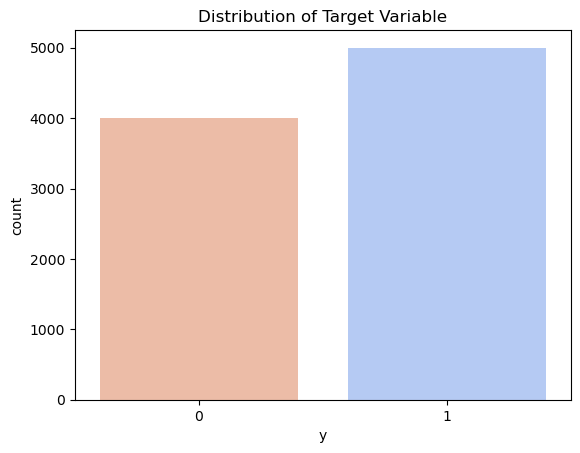

In [59]:
sns.countplot(x='y',data=df,palette='coolwarm_r').set(title="Distribution of Target Variable")

In [60]:
#train test split
from sklearn.model_selection import train_test_split
y = df.y
x = df.drop('y', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [61]:
x_train

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2539,0.267602,2,2,0,-0.468101,0,0,1,-0.353507,10,...,0,0,0,1,0,0,0,0,1,0
401,-1.245394,0,2,0,-0.300952,0,1,1,-0.959806,6,...,0,0,0,0,0,0,0,0,0,1
4237,-0.772583,0,2,0,0.220098,0,0,1,-0.838546,1,...,0,0,0,1,0,0,0,0,0,1
3881,0.267602,0,2,0,0.085183,0,0,2,0.495312,9,...,0,0,0,1,0,0,0,0,0,1
2515,-0.961707,1,2,0,-0.402305,1,0,1,0.252792,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,-1.245394,0,1,0,-0.325875,0,0,1,0.374052,5,...,1,0,0,0,0,0,0,1,0,0
2318,1.118663,1,2,0,-0.397985,1,0,1,0.495312,3,...,0,0,0,0,0,0,1,0,0,0
1285,1.213225,1,2,0,-0.344484,1,0,1,-1.687365,7,...,0,1,0,0,0,0,0,0,0,1
2074,1.118663,1,2,0,-0.396323,0,1,1,-0.353507,7,...,0,0,0,1,0,0,0,0,0,1


In [62]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [63]:
# list model name and accuracies
models = []
accuracies = []


In [66]:
def fig_roc_curve(model, model_name): 
    y_prob = model.predict_proba(x_test)[:,1]
    fp, tp, treshold = roc_curve(y_test, y_prob)

    fig = plt.figure(figsize=(5,4)) 
    fig.set_facecolor('white')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label=model ,color = "r")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve',fontsize=16)
    plt.show()

Accuracy =  0.8105555555555556 

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       781
           1       0.84      0.82      0.83      1019

    accuracy                           0.81      1800
   macro avg       0.81      0.81      0.81      1800
weighted avg       0.81      0.81      0.81      1800

Confusion Matrix: 
 [[627 154]
 [187 832]]


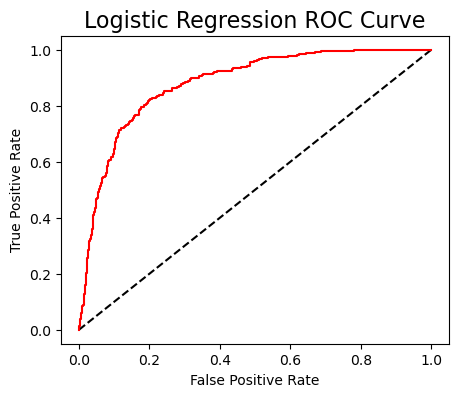

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Logistic Regression'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

Accuracy =  0.98 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       781
           1       0.97      1.00      0.98      1019

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800

Confusion Matrix: 
 [[ 745   36]
 [   0 1019]]


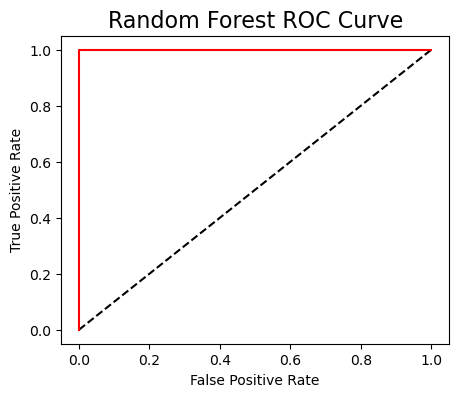

In [71]:
from sklearn.ensemble import RandomForestClassifier
RandomForest  = RandomForestClassifier(n_estimators = 100)
model = RandomForest.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Random Forest'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

Accuracy =  0.8044444444444444 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       781
           1       0.84      0.81      0.82      1019

    accuracy                           0.80      1800
   macro avg       0.80      0.80      0.80      1800
weighted avg       0.81      0.80      0.80      1800

Confusion Matrix: 
 [[627 154]
 [198 821]]


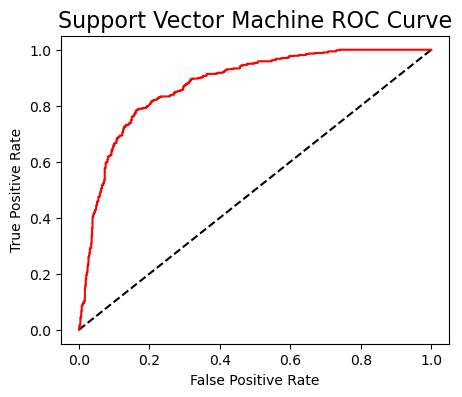

In [75]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',probability=True)
model = svc.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Support Vector Machine'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)